# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [9]:
from __future__ import absolute_import, division, print_function

In [10]:
import tensorflow as tf
import numpy as np
rng = np.random

In [11]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [12]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [34]:
from mlaide.model import ArtifactRef
from mlaide.client import MLAideClient, ConnectionOptions

project_key = 'tf-test'
options = ConnectionOptions(
  server_url='http://192.168.178.24:9000/api/v1', 
  api_key='YXV0aDB8NWY1M2FiNjc0MmUzNDUwMDZkYjJiOGQyOjlNaMOX4oCm4oKtauKCqnNCROKAsg=='
)
mlaide_client = MLAideClient(project_key=project_key, options=options)

In [36]:
run = mlaide_client.start_new_run(experiment_key='linear-regression', run_name='linear regression')

In [13]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [14]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [15]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.300380, W: 0.405088, b: -0.289114
step: 100, loss: 0.268764, W: 0.387528, b: -0.164617
step: 150, loss: 0.243970, W: 0.371977, b: -0.054368
step: 200, loss: 0.224526, W: 0.358205, b: 0.043266
step: 250, loss: 0.209277, W: 0.346010, b: 0.129726
step: 300, loss: 0.197319, W: 0.335210, b: 0.206292
step: 350, loss: 0.187941, W: 0.325646, b: 0.274097
step: 400, loss: 0.180587, W: 0.317176, b: 0.334142
step: 450, loss: 0.174819, W: 0.309676, b: 0.387315
step: 500, loss: 0.170296, W: 0.303034, b: 0.434404
step: 550, loss: 0.166749, W: 0.297152, b: 0.476104
step: 600, loss: 0.163967, W: 0.291943, b: 0.513032
step: 650, loss: 0.161786, W: 0.287331, b: 0.545735
step: 700, loss: 0.160075, W: 0.283246, b: 0.574695
step: 750, loss: 0.158734, W: 0.279628, b: 0.600341
step: 800, loss: 0.157682, W: 0.276425, b: 0.623052
step: 850, loss: 0.156856, W: 0.273588, b: 0.643164
step: 900, loss: 0.156209, W: 0.271076, b: 0.660974
step: 950, loss: 0.155702, W: 0.268851, b: 0.676747
step: 1000

In [16]:
import matplotlib.pyplot as plt

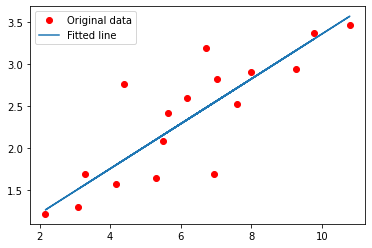

In [17]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()